In [1]:
from tensorflow import keras

In [2]:
import numpy as np

In [5]:
import pandas as pd

In [56]:
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('SeoulHourlyAvgAirPollution.csv')

In [152]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 8 columns):
측정일시            4225 non-null int64
측정소명            4225 non-null object
이산화질소농도(ppm)    4187 non-null float64
오존농도(ppm)       4183 non-null float64
일산화탄소농도(ppm)    4183 non-null float64
아황산가스(ppm)      4187 non-null float64
미세먼지(㎍/㎥)       4166 non-null float64
초미세먼지(㎍/㎥)      4161 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 264.1+ KB


In [154]:
df['이산화질소농도(ppm)'].fillna(df.groupby('측정소명')['이산화질소농도(ppm)'].transform('median'), inplace = True)

In [155]:
df['오존농도(ppm)'].fillna(df.groupby('측정소명')['오존농도(ppm)'].transform('median'), inplace = True)

In [156]:
df['일산화탄소농도(ppm)'].fillna(df.groupby('측정소명')['일산화탄소농도(ppm)'].transform('median'), inplace = True)

In [157]:
df['아황산가스(ppm)'].fillna(df.groupby('측정소명')['아황산가스(ppm)'].transform('median'), inplace = True)

In [158]:
df = df.dropna()

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4224
Data columns (total 8 columns):
측정일시            4140 non-null int64
측정소명            4140 non-null object
이산화질소농도(ppm)    4140 non-null float64
오존농도(ppm)       4140 non-null float64
일산화탄소농도(ppm)    4140 non-null float64
아황산가스(ppm)      4140 non-null float64
미세먼지(㎍/㎥)       4140 non-null float64
초미세먼지(㎍/㎥)      4140 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 291.1+ KB


In [160]:
df2 = df.drop_duplicates('측정소명')

In [161]:
li = np.array(df2['측정소명'])

In [162]:
def ListMaptoDict(somelist):
    return {somelist[x]:x for x in range(len(li))}

local = ListMaptoDict(li)
local

{'강남구': 0,
 '강동구': 1,
 '강북구': 2,
 '강서구': 3,
 '관악구': 4,
 '광진구': 5,
 '구로구': 6,
 '금천구': 7,
 '노원구': 8,
 '도봉구': 9,
 '동대문구': 10,
 '동작구': 11,
 '마포구': 12,
 '서대문구': 13,
 '서초구': 14,
 '성동구': 15,
 '성북구': 16,
 '송파구': 17,
 '양천구': 18,
 '영등포구': 19,
 '용산구': 20,
 '은평구': 21,
 '종로구': 22,
 '중구': 23,
 '중랑구': 24}

In [163]:
df['측정소명'] = df['측정소명'].map(local)

In [164]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201711242300,0,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,0,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,0,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,0,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,0,0.033,0.008,0.4,0.005,20.0,10.0


In [165]:
def GetYear(row):
    return int(row/100000000)
def GetMonth(row):
    return int((row % 100000000)/1000000)
def GetDay(row):
    return int((row % 1000000)/10000)
def GetHour(row):
    return int((row % 10000)/100)
def GetMinute(row):
    return int((row % 100))

df['년'] = df['측정일시'].apply(GetYear)
df['월'] = df['측정일시'].apply(GetMonth)
df['일'] = df['측정일시'].apply(GetDay)
df['시'] = df['측정일시'].apply(GetHour)
df['분'] = df['측정일시'].apply(GetMinute)

df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),년,월,일,시,분
0,201711242300,0,0.038,0.004,0.4,0.005,16.0,10.0,2017,11,24,23,0
1,201711242200,0,0.031,0.008,0.4,0.005,17.0,9.0,2017,11,24,22,0
2,201711242100,0,0.025,0.012,0.4,0.005,18.0,11.0,2017,11,24,21,0
3,201711242000,0,0.033,0.007,0.4,0.005,21.0,12.0,2017,11,24,20,0
4,201711241900,0,0.033,0.008,0.4,0.005,20.0,10.0,2017,11,24,19,0


In [166]:
df=df.drop(['측정일시'], axis = 1)
df=df.drop(['년'], axis = 1)
df=df.drop(['월'], axis = 1)

In [167]:
df.head()

,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일,시,분
0,0,0.038,0.004,0.4,0.005,16.0,10.0,24,23,0
1,0,0.031,0.008,0.4,0.005,17.0,9.0,24,22,0
2,0,0.025,0.012,0.4,0.005,18.0,11.0,24,21,0
3,0,0.033,0.007,0.4,0.005,21.0,12.0,24,20,0
4,0,0.033,0.008,0.4,0.005,20.0,10.0,24,19,0


In [168]:
df = df[['일', '시', '분', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]

In [169]:
df.head()

,일,시,분,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,24,23,0,0,0.038,0.004,0.4,0.005,16.0,10.0
1,24,22,0,0,0.031,0.008,0.4,0.005,17.0,9.0
2,24,21,0,0,0.025,0.012,0.4,0.005,18.0,11.0
3,24,20,0,0,0.033,0.007,0.4,0.005,21.0,12.0
4,24,19,0,0,0.033,0.008,0.4,0.005,20.0,10.0


In [170]:
y_data = df['초미세먼지(㎍/㎥)']
y_data = np.array(y_data)
y_data = y_data.reshape(-1, 1)

x_data = df.iloc[:,:-1]
x_data = np.array(x_data)
x_data[:,0] = x_data[:,0]/30
x_data[:,1] = x_data[:,1]/24
x_data[:,2] = x_data[:,2]/60
x_data[:,3] = x_data[:,3]/25

In [171]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(9, ), use_bias = True, kernel_initializer='normal', bias_initializer='zeros'))
model.add(keras.layers.Dense(10, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(16, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(16, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(8, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(8, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(4, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(4, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(1))

opt = keras.optimizers.Adam(lr=0.005)
model.compile(optimizer = opt, loss = keras.losses.MeanSquaredError())

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_46 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_47 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_48 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_51 (Dense)             (None, 4)                 36        
__________

In [172]:
model.fit(x_data, y_data, batch_size = 256, epochs = 1000)

Epoch 1/1000
4140/4140 [==============================] - 1s 270us/sample - loss: 555.4872
Epoch 2/1000
4140/4140 [==============================] - 0s 10us/sample - loss: 542.5651
Epoch 3/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 246.8349
Epoch 4/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 89.6329
Epoch 5/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 74.4105
Epoch 6/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 73.9458
Epoch 7/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 74.8510
Epoch 8/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 73.4632
Epoch 9/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 75.1926
Epoch 10/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 71.5401
Epoch 11/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 70.9041
Epoch 12/1000
4140/4140 

4140/4140 [==============================] - 0s 9us/sample - loss: 57.8309
Epoch 93/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 58.6558
Epoch 94/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 59.9943
Epoch 95/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 61.2971
Epoch 96/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 59.0455
Epoch 97/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 57.7566
Epoch 98/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 57.9604
Epoch 99/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 57.8542
Epoch 100/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 58.4472
Epoch 101/1000
4140/4140 [==============================] - 0s 10us/sample - loss: 58.7863
Epoch 102/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 57.0243
Epoch 103/1000
4140/4140 [=====

4140/4140 [==============================] - 0s 7us/sample - loss: 58.0243
Epoch 184/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 56.8194
Epoch 185/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 56.8368
Epoch 186/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 56.7483
Epoch 187/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 58.3690
Epoch 188/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 57.3594
Epoch 189/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 55.9922
Epoch 190/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 57.2112
Epoch 191/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 56.8023
Epoch 192/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 57.8010
Epoch 193/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 57.8193
Epoch 194/1000
4140/4140 

4140/4140 [==============================] - 0s 8us/sample - loss: 55.0981
Epoch 275/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 55.6547
Epoch 276/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 55.5678
Epoch 277/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 55.0868
Epoch 278/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 55.1534
Epoch 279/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 56.1995
Epoch 280/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 54.7649
Epoch 281/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 59.5870
Epoch 282/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 55.0507
Epoch 283/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 57.0028
Epoch 284/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 54.7366
Epoch 285/1000
4140/4140 

4140/4140 [==============================] - 0s 8us/sample - loss: 54.6213
Epoch 366/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 53.3835
Epoch 367/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 53.8130
Epoch 368/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 53.7644
Epoch 369/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 54.7126
Epoch 370/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 54.2322
Epoch 371/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 53.9273
Epoch 372/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 55.4333
Epoch 373/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 54.2222
Epoch 374/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 53.0252
Epoch 375/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 57.2992
Epoch 376/1000
4140/4140 

4140/4140 [==============================] - 0s 8us/sample - loss: 30.6687
Epoch 457/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 30.0658
Epoch 458/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 28.3928
Epoch 459/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 29.1276
Epoch 460/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 29.0701
Epoch 461/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 30.1225
Epoch 462/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 30.6184
Epoch 463/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 29.5556
Epoch 464/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 28.9266
Epoch 465/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 30.7359
Epoch 466/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 29.3836
Epoch 467/1000
4140/4140 

4140/4140 [==============================] - 0s 10us/sample - loss: 27.8071
Epoch 548/1000
4140/4140 [==============================] - 0s 10us/sample - loss: 27.6139
Epoch 549/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 27.7206
Epoch 550/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 27.8629
Epoch 551/1000
4140/4140 [==============================] - 0s 10us/sample - loss: 28.4677
Epoch 552/1000
4140/4140 [==============================] - 0s 10us/sample - loss: 29.0936
Epoch 553/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 28.6462
Epoch 554/1000
4140/4140 [==============================] - 0s 11us/sample - loss: 29.1418
Epoch 555/1000
4140/4140 [==============================] - 0s 10us/sample - loss: 27.2368
Epoch 556/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 28.1872
Epoch 557/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 29.5031
Epoch 558/1000
4140

4140/4140 [==============================] - 0s 8us/sample - loss: 26.1922
Epoch 638/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 25.1308
Epoch 639/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 25.6135
Epoch 640/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 27.3118
Epoch 641/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 25.4705
Epoch 642/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 25.0911
Epoch 643/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 25.5852
Epoch 644/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 25.7299
Epoch 645/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 24.8834
Epoch 646/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 24.5766
Epoch 647/1000
4140/4140 [==============================] - 0s 9us/sample - loss: 24.3891
Epoch 648/1000
4140/4140 

4140/4140 [==============================] - 0s 8us/sample - loss: 24.4674
Epoch 729/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 23.1480
Epoch 730/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 23.8960
Epoch 731/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 25.4587
Epoch 732/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 25.0388
Epoch 733/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 24.8011
Epoch 734/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 23.1475
Epoch 735/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 23.3523
Epoch 736/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 22.6533
Epoch 737/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 23.9030
Epoch 738/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 24.0498
Epoch 739/1000
4140/4140 

4140/4140 [==============================] - 0s 7us/sample - loss: 24.3825
Epoch 820/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 22.7430
Epoch 821/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 23.2039
Epoch 822/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 24.1710
Epoch 823/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 24.5427
Epoch 824/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 22.8596
Epoch 825/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 23.9593
Epoch 826/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 23.7107
Epoch 827/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 22.9652
Epoch 828/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 22.2454
Epoch 829/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 22.9482
Epoch 830/1000
4140/4140 

4140/4140 [==============================] - 0s 8us/sample - loss: 22.2180
Epoch 911/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 23.0576
Epoch 912/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 22.6301
Epoch 913/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 22.4677
Epoch 914/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 23.8941
Epoch 915/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 22.9643
Epoch 916/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 22.1539
Epoch 917/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 22.7864
Epoch 918/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 22.1638
Epoch 919/1000
4140/4140 [==============================] - 0s 7us/sample - loss: 22.1965
Epoch 920/1000
4140/4140 [==============================] - 0s 8us/sample - loss: 23.5984
Epoch 921/1000
4140/4140 

In [173]:
y_pred = model.predict(x_data)

In [176]:
y_pred2 = y_pred[1300:1400]
y_data2 = y_data[1300:1400]

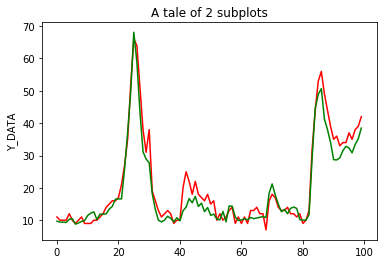

In [177]:
plt.plot(y_data2, color='red')
plt.plot(y_pred2, color='green')
plt.title('A tale of 2 subplots')
plt.ylabel('Y_DATA')

plt.show()